In [71]:
# examine continuous feature distributions
# apply transformation to make some features more normal
# may help remove outliers
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
plt.style.use('ggplot')

16


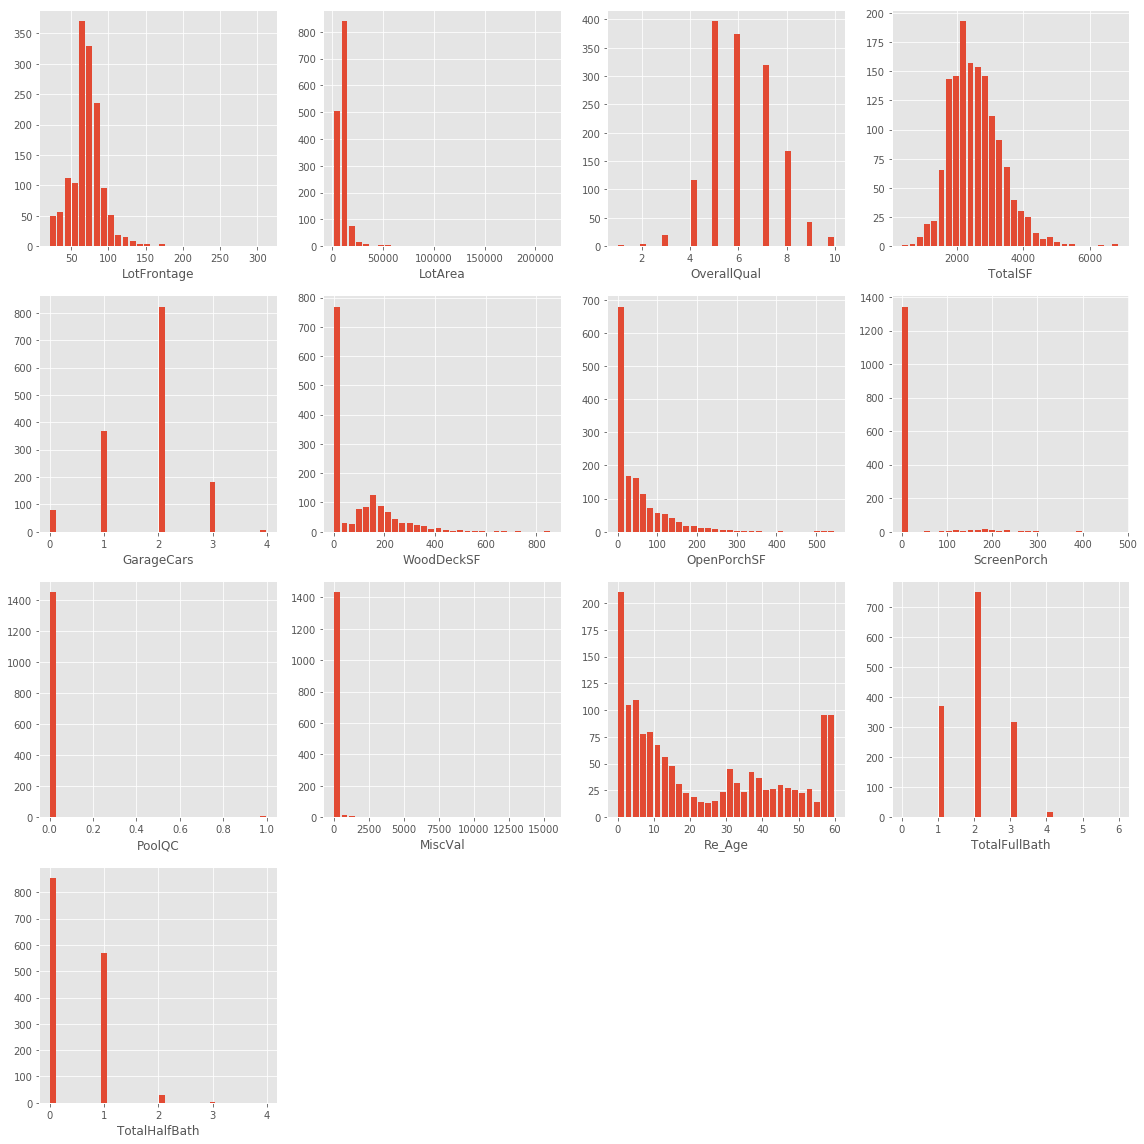

In [72]:
X  = pd.read_csv("../results/s1_clean_reducedata.csv")
X['TotalSF'] = X['GrLivArea'] + X['TotalBsmtSF']
X = X.drop(['GrLivArea','TotalBsmtSF', 'Age', 'TotRmsAbvGrd'], axis = 1)
con_var = ['LotFrontage', 'LotArea', 'OverallQual','TotalSF', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'ScreenPorch', 'PoolQC', 'MiscVal', 'Re_Age', 'TotalFullBath',
       'TotalHalfBath']
print(len(con_vars))
plt.figure(figsize = (16,16))
for i, v in enumerate(con_var):
    plt.subplot(4,4,i+1)
    plt.hist(X[v], bins = 30, rwidth = 0.8) 
    plt.xlabel(v)
plt.tight_layout()
plt.show()

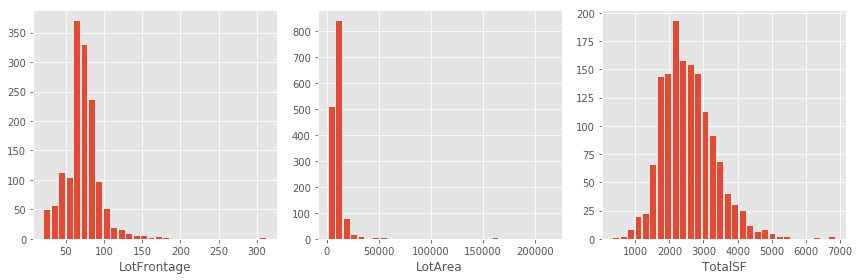

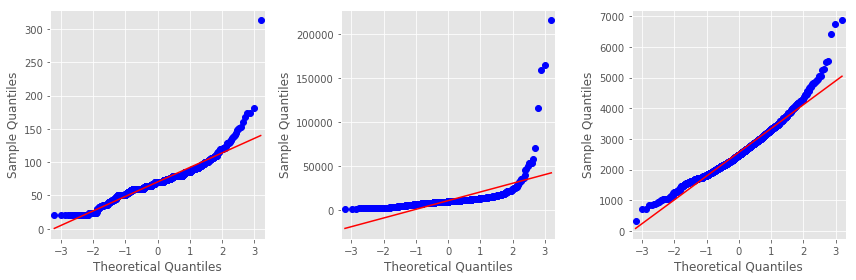

LotFrontage  skew: 1.4922163005795452 

LotFrontage kurtosis: 12.340696408863932 

LotArea  skew: 12.560985555655309 

LotArea kurtosis: 212.85479182056525 

TotalSF  skew: 0.8162399166838374 

TotalSF kurtosis: 1.7981208540846199 



In [73]:
trans_var = ['LotFrontage', 'LotArea', 'TotalSF']

plt.figure(figsize = (12,4))
for i, v in enumerate(trans_var):
    plt.subplot(1,3,i+1)
    plt.hist(X[v], bins = 30, rwidth = 0.8) 
    plt.xlabel(v)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize = (12,4))
for i, v in enumerate(trans_var):
    ax1 = fig.add_subplot(1,3,i+1)
    qqplot(X[v],line='s', ax = ax1)
plt.tight_layout()
plt.show()

for v in trans_var:
    print(v, " skew:",stats.skew(X[v]),"\n")
    print(v, "kurtosis:",stats.kurtosis(X[v]),"\n")

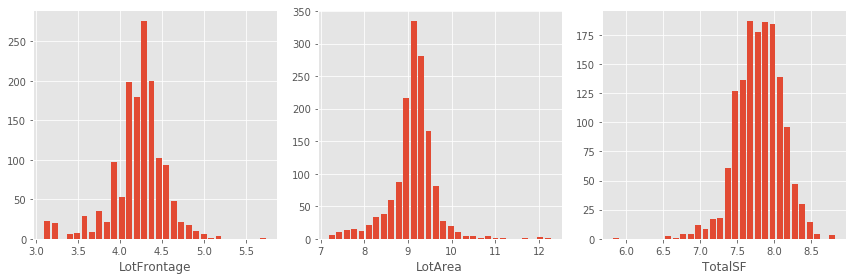

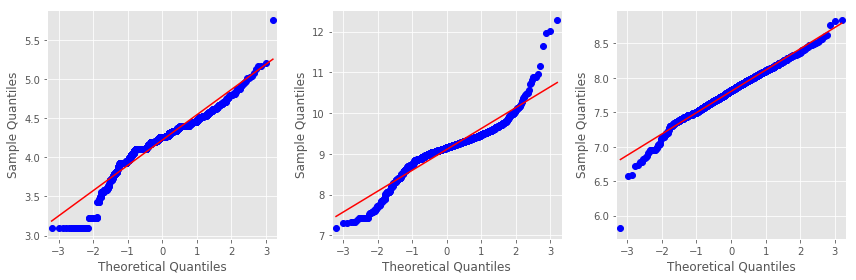

LotFrontage  skew: -0.9376242260854746 

LotFrontage kurtosis: 2.690288983035506 

LotArea  skew: -0.18109103307109672 

LotArea kurtosis: 4.730775535794716 

TotalSF  skew: -0.46467858159899245 

TotalSF kurtosis: 1.6692079228703438 



In [74]:
trans_var = ['LotFrontage', 'LotArea', 'TotalSF']
Xt = X[trans_var].copy()
for v in trans_var:
    Xt[v] = np.log1p(X[v])

plt.figure(figsize = (12,4))
for i, v in enumerate(trans_var):
    plt.subplot(1,3,i+1)
    plt.hist(Xt[v], bins = 30, rwidth = 0.8) 
    plt.xlabel(v)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize = (12,4))
for i, v in enumerate(trans_var):
    ax1 = fig.add_subplot(1,3,i+1)
    qqplot(Xt[v],line='s', ax = ax1)
plt.tight_layout()
plt.show()

for v in trans_var:
    print(v, " skew:",stats.skew(Xt[v]),"\n")
    print(v, "kurtosis:",stats.kurtosis(Xt[v]),"\n")

In [75]:
# use standardization on Xt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xt = scaler.fit_transform(Xt)
Xt = pd.DataFrame(Xt, columns = trans_var)

X[trans_var] = Xt[trans_var]
X_outlier = Xt.apply(lambda t: abs(t) > 4)

In [76]:
# number of outliers flagged per feature
print("Number of outlier per feature:", X_outlier.sum(axis = 0),"\n")
print("Number of observations with outlier features:", np.sum(X_outlier.any(axis=1)))

Number of outlier per feature: LotFrontage    1
LotArea        5
TotalSF        1
dtype: int64 

Number of observations with outlier features: 7


In [77]:
outlier_idx = X_outlier.index[ X_outlier.any(axis=1) == True ].tolist() 
X.iloc[outlier_idx,:][ con_var]

,LotFrontage,LotArea,OverallQual,TotalSF,GarageCars,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolQC,MiscVal,Re_Age,TotalFullBath,TotalHalfBath
249,0.543597,5.585007,6,1.237087,2,0,98,0,0,500,1,2,1
313,2.471980,6.174792,7,1.724971,2,0,0,0,0,0,44,4,0
335,0.729051,5.653121,5,0.951651,2,670,0,0,0,700,43,4,0
451,-0.234513,4.008486,7,0.728451,2,200,54,0,0,0,31,3,0
532,-0.888760,-1.151275,1,-6.437401,0,0,0,0,0,0,57,1,0
705,0.543597,4.956659,7,1.126101,2,380,48,0,0,0,5,3,0
933,4.738719,2.178675,7,0.261622,2,0,0,0,0,0,1,3,0
